#  Projeto 3 Ciência dos Dados - Mercado Imobiliário
Grupo 1 / 2C

Arthur Carvalho,
Fernando Bichuette,
Guilherme Lunetta,
Rafael Kahn.

In [14]:
%matplotlib inline
%reset -f
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, uniform, probplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import mpl_toolkits

In [50]:
#Definir seed
RANDOM_SEED = 69
np.random.seed(RANDOM_SEED)

In [29]:
#Abrindo a base de dados 

data = pd.read_csv("sao-paulo-properties-april-2019.csv")
data.drop(data.columns[[15, 14]], axis=1, inplace=True)
data = data[data['Negotiation Type'] == 'sale']
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment


In [30]:
data.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
count,6.412000e+03,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,6.086241e+05,537.349813,78.611042,2.320805,2.037742,0.931535,1.326575,0.415471,0.117280,0.539457,0.032283
std,7.404515e+05,624.632473,50.872359,0.714743,0.917844,0.772615,0.751658,0.492841,0.321779,0.498480,0.176765
min,4.200000e+04,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000e+05,150.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000e+05,400.000000,62.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.790000e+05,700.000000,87.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000e+07,8920.000000,620.000000,6.000000,7.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000


### Price x Condo

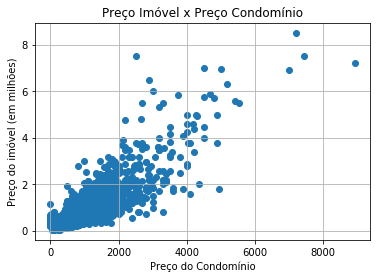

In [59]:
plt.scatter(data['Condo'][data['Condo']!=0], data['Price'][data['Condo']!=0]/1000000)
plt.xlabel('Preço do Condomínio')
plt.ylabel('Preço do imóvel (em milhões)')
plt.title('Preço Imóvel x Preço Condomínio')
plt.grid(True)
plt.show()

In [60]:
data['Price'].corr(data['Condo'])

0.6144562283005393

* Por esse gráfico podemos analisar que o preço do condomínio tem uma influência razoável no preço do imóvel. Existem outliers significantes que podreão ser desconsiderados. Analisando também a correlação, é possível dizer que o Preço do Condomínio é significante para nosso trabalho

### Price x Size

In [54]:
a = data["Price"]/1000000

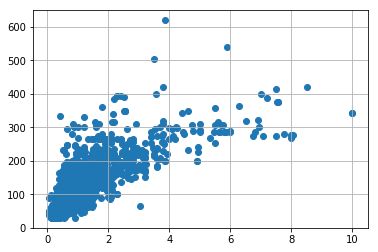

In [55]:
x1 = a
y1 = data["Size"]

plt.scatter(x1,y1)
plt.grid(True)

In [56]:
x1.corr(y1)

0.8256597461587777

* A partir desse gráfico, pode-se observar que o tamanho do imóvel tem grande influência no preço do imóvel, com uma correlação de 0.82 e pouquíssimos outliers. Com certeza entra na lista de variáveis significantes

### Price x Toilets

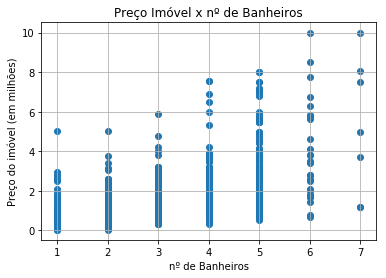

In [53]:
plt.scatter(data['Toilets'], data['Price']/1000000)
plt.xlabel('nº de Banheiros')
plt.ylabel('Preço do imóvel (em milhões)')
plt.title('Preço Imóvel x nº de Banheiros')
plt.grid(True)
plt.show()

In [52]:
data['Price'].corr(data['Toilets'])

0.6367815589851188

* O número de banheiros é razoavelmente significante em relação ao preço de um imóvel pois sua correlação está em torno de 0.6. Quase não tem outliers.

### Scatter Price x Rooms

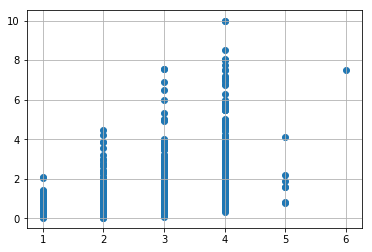

In [46]:
x2 =  data[data['Negotiation Type'] == 'sale'].loc[:,['Rooms']]
y2 =  a

plt.scatter(x2,y2)
plt.grid(True)

Opa fion

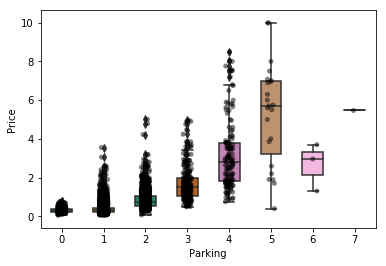

In [47]:
# make boxplot with Seaborn
bplot=sns.boxplot(y=a, x='Parking', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y=a, x='Parking', 
                   data=data, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

In [1]:
#X = data[['Size','Rooms','Toilets','Suites','Swimming Pool','Condo']]
#y = data['Price']

In [67]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [ ]:
#model = RandomForestClassifier(n_estimators=100)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))